## MNIST digit recognition: a multiclass classification task

Before getting into building neural networks with PyTorch, let's first try tackling the MNIST digit recognition task with several classification algorithms using scikit-learn:
1. K Nearest Neighbors
2. Logistic Regression
3. Random Forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#### Fetching the MNIST dataset:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

#### Examining the data:

The MNIST dataset consists of 70000 images of digits. Each image is 28x28 pixels in size (784 total pixels), with pixel intensity ranging from 0 to 255. The target values are integers from 0 to 9.

In [4]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X, y = mnist.data, mnist.target
X = X.to_numpy()    # Store X and y data as numpy arrays

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

#### Display an example image:

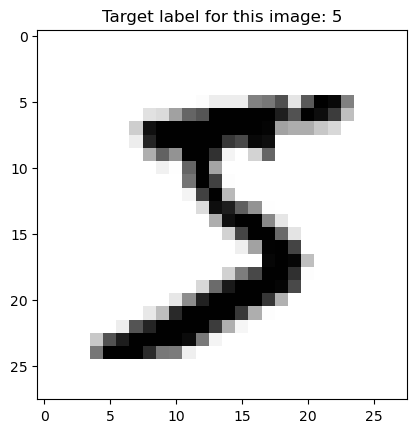

In [17]:
plt.imshow(X[0].reshape(28, 28), cmap="binary")
plt.title(f'Target label for this image: {y[0]}')
plt.show()

#### Let's display some more examples from the MNIST dataset:

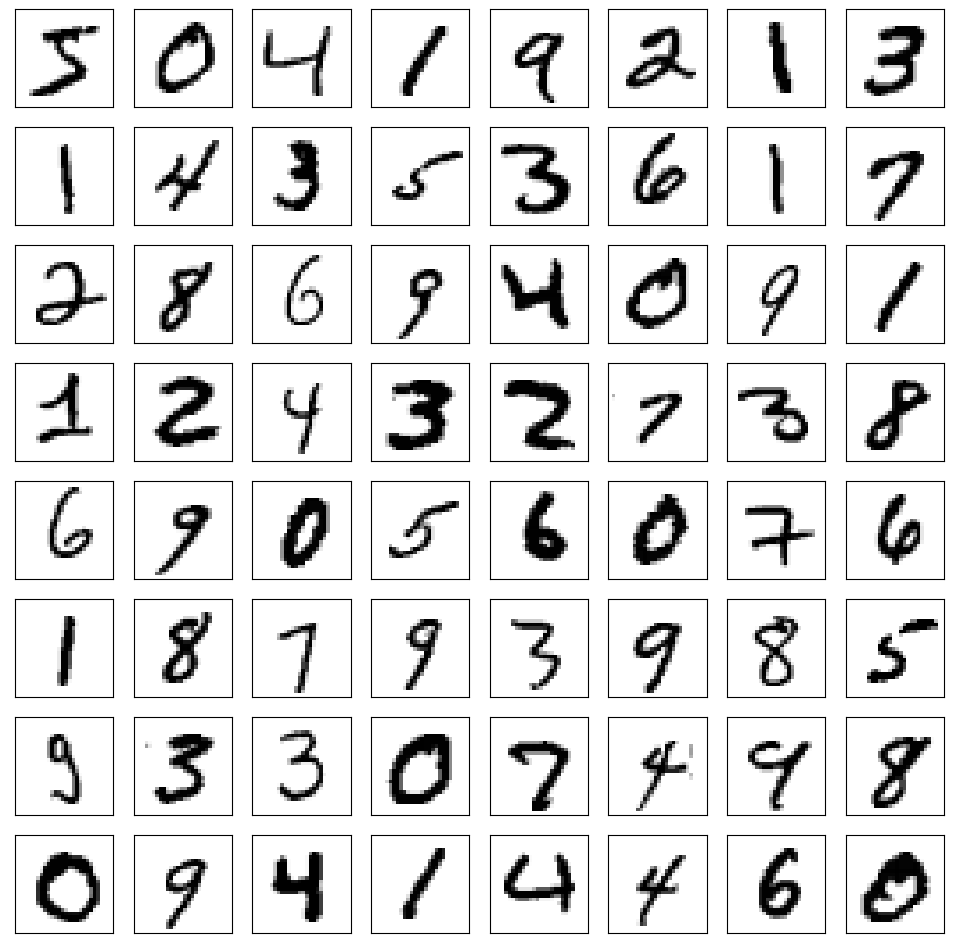

In [19]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
index = 0

for i in range(8):
    for j in range(8):

        axs[i, j].imshow(X[index].reshape(28, 28), cmap="binary")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        index += 1

#### Split into train and test sets:

In [27]:
# 60000 in train set, 10000 in test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/7, random_state=1)


# Standardize pixel value to range [0, 1]:

X_train_std = X_train / 255
X_test_std = X_test / 255

## 1. KNN Classifier:

#### Training model:

We can perform 5-fold cross-validation to find the optimal value of hyperparameter k:

In [30]:
knn = GridSearchCV(KNeighborsClassifier(), param_grid={"n_neighbors":list(range(1, 10)), "weights":["uniform", "distance"]}, cv=5, scoring="accuracy", verbose=3)
knn.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.950 total time=   0.7s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.942 total time=   0.5s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.944 total time=   0.5s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.950 total time=   0.5s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.946 total time=   0.5s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.950 total time=   0.4s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.942 total time=   0.3s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.944 total time=   0.3s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.950 total time=   0.3s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.946 total time=   0.4s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.933 total time=   0.5s
[CV 2/5] END ....n_neighbors=2, weights=uniform;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [31]:
print("KNN best parameters: ")
print(knn.best_params_)

KNN best parameters: 
{'n_neighbors': 4, 'weights': 'distance'}


In [32]:
best_knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
best_knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

#### Evaluate model on test set:

In [33]:
y_pred_best_knn = best_knn.predict(X_test_std)
best_knn_accuracy = best_knn.score(X_test_std, y_test)
print(best_knn_accuracy)

0.9511333333333334


#### Classification report and confusion matrix:





Classification Report for KNN classifier: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5896
           1       0.93      0.99      0.96      6756
           2       0.98      0.93      0.96      6035
           3       0.94      0.94      0.94      6104
           4       0.97      0.94      0.95      5851
           5       0.94      0.93      0.94      5428
           6       0.97      0.98      0.98      5884
           7       0.94      0.96      0.95      6236
           8       0.97      0.89      0.93      5846
           9       0.91      0.95      0.93      5964

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000




Confusion Matrix for KNN classifier: 



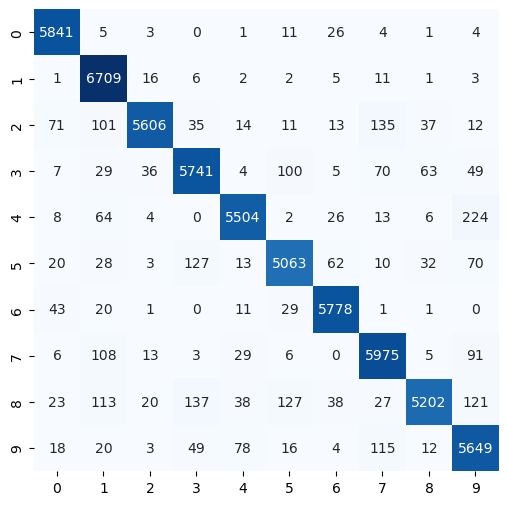

In [34]:
print('\n\n\n')
print('Classification Report for KNN classifier: \n')
print(classification_report(y_test, y_pred_best_knn))
print('\n\n')
print('Confusion Matrix for KNN classifier: \n')
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_best_knn), annot=True, fmt='g', cmap='Blues', cbar=False)
plt.show()

#### Misclassification analysis:

Let's take a look at some of the misclassified samples along with their true label:

In [35]:
correct_pred = np.asarray(y_test == y_pred_best_knn)
misclassified = np.where(correct_pred == False)[0]

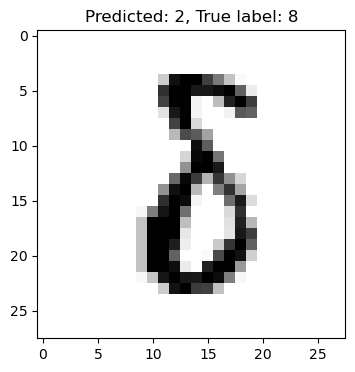

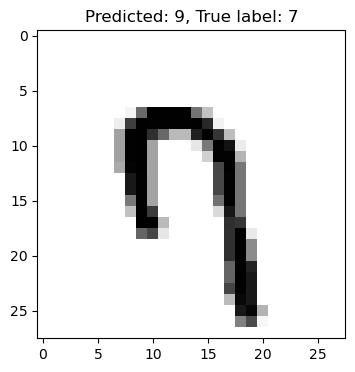

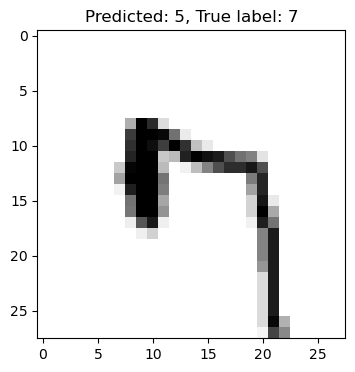

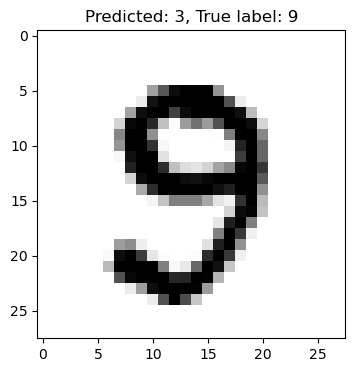

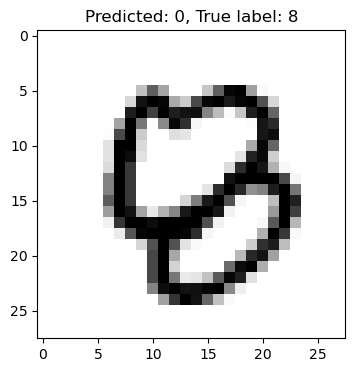

In [36]:

for i in range(5):
    image_idx = misclassified[i]
    plt.figure(figsize=(4,4))
    plt.imshow(X_test[image_idx].reshape(28, 28), cmap="binary")
    plt.title('Predicted: ' + str(y_pred_best_knn[image_idx]) + ', True label: ' + str(np.asarray(y_test)[image_idx]))
    plt.show()
